<a href="https://colab.research.google.com/github/ZulfikarAkbar06/tugas1/blob/main/Praktikun_Big_Data_pertemua_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Tugas 1
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Dokter", "Membaca", "Pria"),
        ("Budi", 23, "Guru", "Olahraga", "Pria"),
        ("Citra", 29, "Insinyur", "Memasak", "Wanita"),
        ("Dina", 45, "Perawat", "Berkebun", "Wanita")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-----+----+---------+--------+------+
| Nama|Usia|Pekerjaan|    Hobi|Gender|
+-----+----+---------+--------+------+
|  Ali|  34|   Dokter| Membaca|  Pria|
| Budi|  23|     Guru|Olahraga|  Pria|
|Citra|  29| Insinyur| Memasak|Wanita|
| Dina|  45|  Perawat|Berkebun|Wanita|
+-----+----+---------+--------+------+



In [ ]:
# Tugas 2
from pyspark.sql import SparkSession
import pandas as pd

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana PySpark
data_spark = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns_spark = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns_spark)

# Menampilkan DataFrame PySpark
df_spark.show()

# Filtering data PySpark
df_filtered_spark = df_spark.filter(df_spark['Usia'] > 25)
df_filtered_spark.show()

# Menghitung rata-rata usia PySpark
from pyspark.sql.functions import avg
df_spark.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia PySpark
df_sorted_spark = df_spark.orderBy("Usia", ascending=False)
df_sorted_spark.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
|Citra|  29|
| Dina|  45|
+-----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+


Pandas DataFrame:


,Nama,Usia
0,Ali,34
1,Budi,23
2,Citra,29
3,Dina,45


In [ ]:
# Tugas 3
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas
print("DataFrame Pandas Awal:")
display(df_pandas)

# Menambahkan kolom baru 'Kota'
df_pandas['Kota'] = ["Jakarta", "Bandung", "Surabaya", "Yogyakarta"]
print("\nDataFrame Pandas setelah menambahkan kolom 'Kota':")
display(df_pandas)

# Filtering data berdasarkan usia > 30
df_filtered_pandas = df_pandas[df_pandas['Usia'] > 30]
print("\nDataFrame Pandas setelah filtering Usia > 30:")
display(df_filtered_pandas)

DataFrame Pandas Awal:


,Nama,Usia
0,Ali,34
1,Budi,23
2,Citra,29
3,Dina,45



DataFrame Pandas setelah menambahkan kolom 'Kota':


,Nama,Usia,Kota
0,Ali,34,Jakarta
1,Budi,23,Bandung
2,Citra,29,Surabaya
3,Dina,45,Yogyakarta



DataFrame Pandas setelah filtering Usia > 30:


,Nama,Usia,Kota
0,Ali,34,Jakarta
3,Dina,45,Yogyakarta


    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


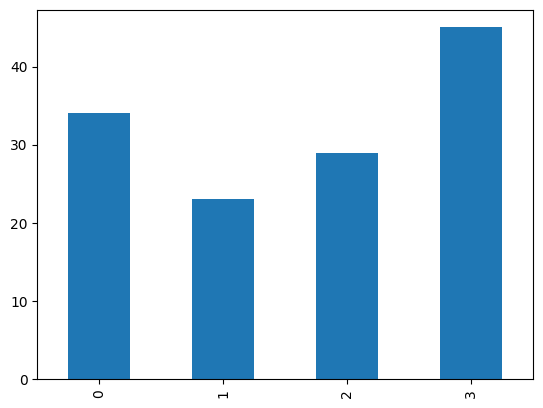

In [ ]:
# Tugas 4
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

In [ ]:
# Tugas 5
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

# Menggabungkan data dari PySpark (setelah dikonversi ke Pandas) dengan data dari Pandas
df_combined = pd.merge(df_pandas_from_spark, df_pandas, on="Nama", suffixes=('_spark', '_pandas'))

# Menampilkan DataFrame gabungan
print("\nDataFrame Gabungan:")
display(df_combined)

# Melakukan analisis sederhana: menghitung rata-rata usia dari DataFrame gabungan
average_age_combined = df_combined['Usia_spark'].mean() # Menggunakan kolom usia dari PySpark yang dikonversi
print(f"\nRata-rata Usia dari DataFrame Gabungan: {average_age_combined}")

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+


DataFrame Gabungan:


,Nama,Usia_spark,Usia_pandas
0,Ali,34,34
1,Budi,23,23
2,Citra,29,29
3,Dina,45,45



Rata-rata Usia dari DataFrame Gabungan: 32.75


In [ ]:
# Tugas 6
#Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_spark_from_pandas.show()

# Menggabungkan data dari PySpark (setelah dikonversi ke Pandas) dengan data dari Pandas
df_combined = pd.merge(df_pandas_from_spark, df_pandas, on="Nama", suffixes=('_spark', '_pandas'))

# Menampilkan DataFrame gabungan
print("\nDataFrame Gabungan:")
display(df_combined)

# Melakukan operasi statistik: menghitung nilai maksimum usia dari DataFrame gabungan
max_age_combined = df_combined['Usia_spark'].max() # Menggunakan kolom usia dari PySpark yang dikonversi
print(f"\nNilai Maksimum Usia dari DataFrame Gabungan: {max_age_combined}")

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+


DataFrame Gabungan:


,Nama,Usia_spark,Usia_pandas
0,Ali,34,34
1,Budi,23,23
2,Citra,29,29
3,Dina,45,45



Nilai Maksimum Usia dari DataFrame Gabungan: 45
